In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:.3f}".format
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import FuncFormatter

In [2]:
data = pd.read_csv(r'PUBG\train_V2.csv')
data.shape

(4446966, 29)

In [3]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.004,0,11.040,0,0,1434.000,5,0,0.640
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.000,0,0.000,0,0,161.800,2,0,0.775
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.000,0,0.000,0,0,202.700,3,0,0.167
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.000,0,0.000,0,0,49.750,2,0,0.188


In [4]:
# mean dmg dealt ppl with kills and without kills
# number of headshot per kill
# kill strikes
# assists

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


* __groupId__ - identify of group in a match.
* __matchId__ - identify match. 
* __assists__ - Enemies that player damaged which were killed by other player form team.
* __boosts__ - boost items used
* __damageDealt__ 
* __DBNOs__ - knocked enemies.
* __headshotKills__ - Enemies killed by HS
* __heals__ - Healing items used.
* __killPlace__ - Ranki in match by enemies killed.
* __killPoints__ - Rank by kills
* __kills__ - Enemies killed
* __killStreaks__ - Enemies killed in shor time.
* __longestKill__ 
* __maxPlace__ - Worst placement 
* __numGroups__ - Number of groups we have data for in the match.
* __revives__ - Number of times this player revived teammates.
* __rideDistance__ - Distance traveled in vehicles meters.
* __roadKills__ - Kills while in a vehicle.
* __swimDistance__ - Distance swimmed meters
* __teamKills__ - Teammate killed times
* __vehicleDestroys__ - Destroyed vehicles. 
* __walkDistance__ - Distance walked meters
* __weaponsAcquired__ - Weapons 
* __winPoints__ - Rank based on wins
* __winPlacePerc__ - The target of prediction. 

In [6]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
print(f'Average number of kills by player in single match is: ',round(data['kills'].mean(),2))
print('Max kills in single match is: ',data['kills'].max())

Average number of kills by player in single match is:  0.92
Max kills in single match is:  72


## Kills Analysis 

In [8]:
def kills_grouped(x):
    if x == 0:
        return '0 kills'
    elif x >= 1 and x <=3:
        return '1-3 kills'
    elif x >= 4 and x <=5:
        return '4-5 kills'
    elif x >= 6 and x <=9:
        return '6-9 kills'
    elif x >= 10 and x <=20:
        return '10-20 kills'
    elif x >= 20 and x <=50:
        return '20-50 kills'
    else:
        return '+50 kills'

    
def typee(x):
    if ('solo' in x):
        return 'solo'
    elif ('duo' in x):
        return 'duo'
    else:
        return 'squad'
def millions(x, pos):
    return '%1.1fM' % (x*1e-6)

In [9]:
data['kills_grouped'] = data['kills'].apply(lambda x: kills_grouped(x))
data['mtype'] = data['matchType'].apply(lambda x: typee(x))
formatter = FuncFormatter(millions)

In [10]:
dfk = pd.concat([data.groupby('kills_grouped')['Id'].count().sort_values(ascending=False),data.groupby('kills_grouped')['Id'].count().sort_values(ascending=False)/data.shape[0]],axis=1).reset_index()
dfk.columns = ['kills_grouped','count', 'percent']

In [11]:
dfk

,kills_grouped,count,percent
0,0 kills,2529722,0.569
1,1-3 kills,1632986,0.367
2,4-5 kills,191120,0.043
3,6-9 kills,80199,0.018
4,10-20 kills,12476,0.003
5,20-50 kills,450,0.000
6,+50 kills,13,0.000


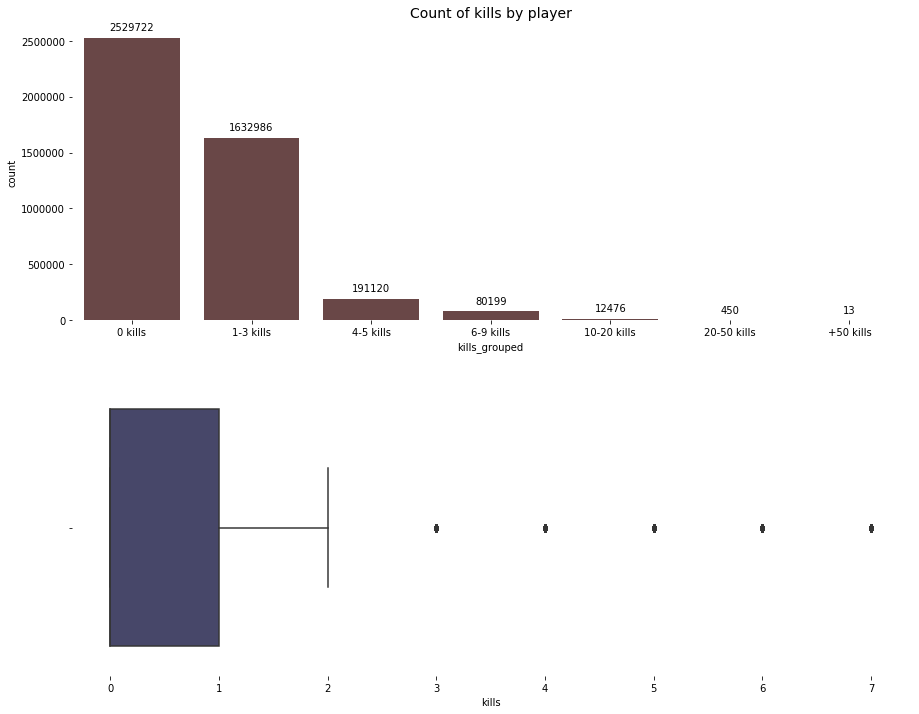

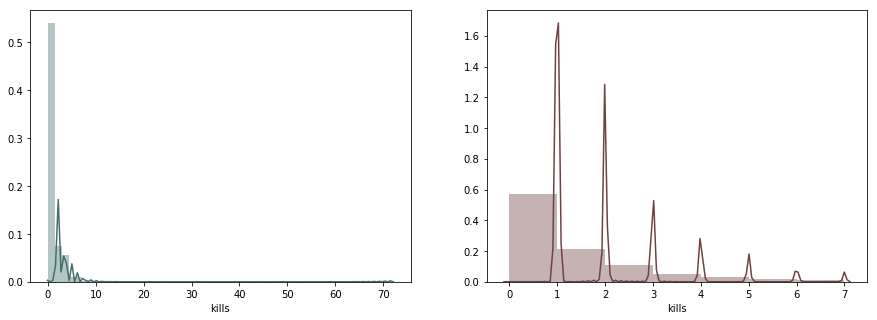

In [12]:
f,ax = plt.subplots(2,1,figsize=(15,12))
a1 = sns.countplot(data['kills_grouped'],palette=['#6F4141'],ax=ax[0])
a1.set_title('Count of kills by player',fontsize=14);
sns.despine(bottom=True, left=True)
for p in a1.patches:
    a1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
a2 = sns.boxplot(data[data['kills']<=data['kills'].quantile(0.99)]['kills'], palette=['#41416f'],ax=ax[1])

f,ax = plt.subplots(1,2,figsize=(15,5))
a3 = sns.distplot(data['kills'],ax=ax[0],color='#416f6f');
a4 = sns.distplot(data[data['kills']<=data['kills'].quantile(0.99)]['kills'],ax=ax[1],color='#6F4141',bins=7);

In [13]:
pd.DataFrame(data['kills'].describe()).T

,count,mean,std,min,25%,50%,75%,max
kills,4446966.000,0.925,1.558,0.000,0.000,0.000,1.000,72.000


In [14]:
data['kills'].quantile(0.95)

4.0

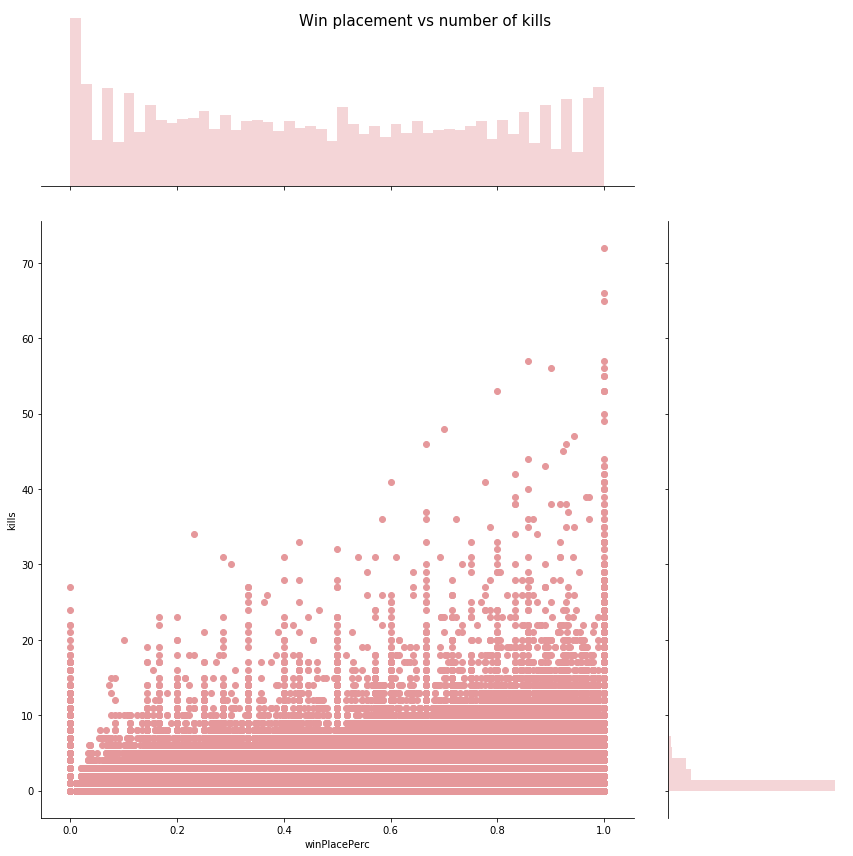

In [15]:
g = sns.jointplot(x="winPlacePerc", y="kills", data=data, height=12, ratio=3,color="#E5989B")
g.fig.suptitle('Win placement vs number of kills',fontsize=15);

In [16]:
data.groupby('mtype')['winPlacePerc'].agg('mean').reset_index().T

,0,1,2
mtype,duo,solo,squad
winPlacePerc,0.485,0.487,0.462


In [17]:
data.groupby('kills_grouped')['winPlacePerc'].agg('mean').reset_index().T

,0,1,2,3,4,5,6
kills_grouped,+50 kills,0 kills,1-3 kills,10-20 kills,20-50 kills,4-5 kills,6-9 kills
winPlacePerc,0.966,0.370,0.571,0.904,0.837,0.790,0.876


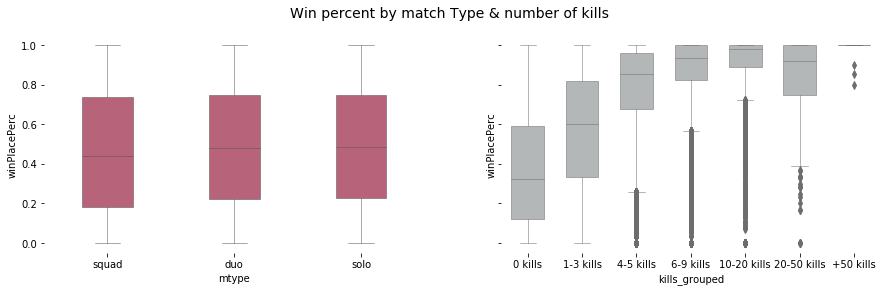

In [18]:
f,ax = plt.subplots(1,2,figsize=(15,4),sharey=True)
sns.boxplot(x='mtype',y='winPlacePerc',data=data,ax=ax[0],palette=['#c55572'],width=0.4,linewidth=0.5)
sns.boxplot(x='kills_grouped',y='winPlacePerc',data=data,ax=ax[1],palette=['#b3b7b8'],width=0.6,linewidth=0.5)
plt.suptitle('Win percent by match Type & number of kills',fontsize=14);
sns.despine(bottom=True,left=True)

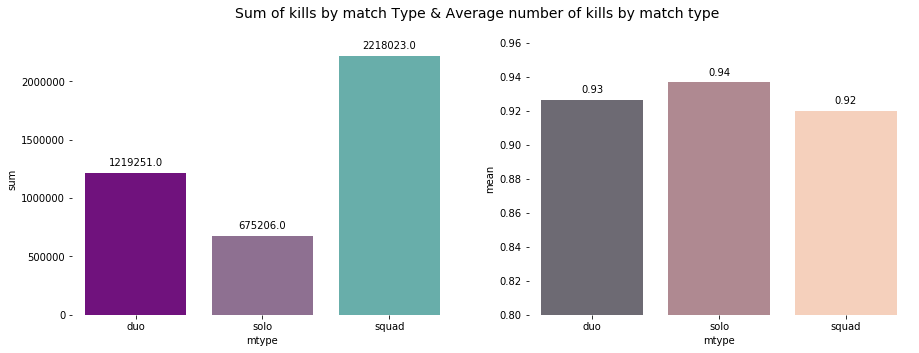

In [19]:
f,ax = plt.subplots(1,2,figsize=(15,5))
a0 =  sns.barplot(x='mtype',y='mean',data=data.groupby('mtype')['kills'].agg(['mean','sum']).reset_index(),ax=ax[1],palette=['#6D6875','#B5838D','#FFCDB2'])
a0.set_ylim(0.8,0.96)
a01 = sns.barplot(x='mtype',y='sum',data=data.groupby('mtype')['kills'].agg(['mean','sum']).reset_index(),ax=ax[0],palette=['#7E008F','#936A97','#5CBAB4'])
sns.despine(bottom=True, left=True)
for p in a0.patches:
    a0.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in a01.patches:
    a01.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.suptitle('Sum of kills by match Type & Average number of kills by match type',fontsize=14);

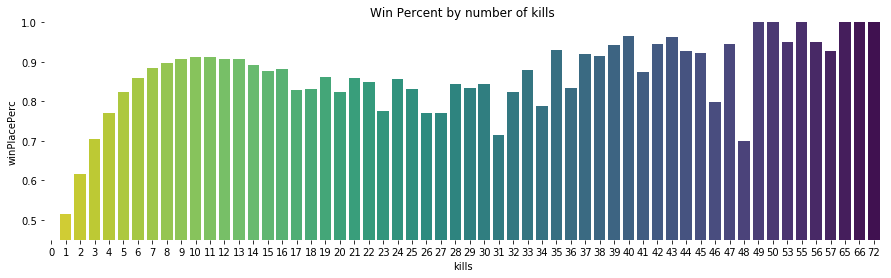

In [20]:
f,ax = plt.subplots(figsize=(15,4))
aoo = sns.barplot(x='kills',y='winPlacePerc',data=data.groupby('kills')['winPlacePerc'].mean().reset_index(),palette='viridis_r')
aoo.set_title('Win Percent by number of kills');
aoo.set_ylim(0.45,1)
sns.despine(bottom=True, left=True)

* In all dataset players made almost 4,5 KK kills.
* Almost 57% of players in single match didn't make any kill
* 75% of players made 0 or 1 kills 
* 95% made <= 4 kills
* We can say that more then 10 kills is outlier :) There is like 15k of more then 10 kills
* We can say that people who play with friends made most kills. But players who join match solo has biggest average number of kills. But average number of kills was very similar in three groups 

In [21]:
pd.DataFrame(data.corr()['kills'].sort_values(ascending=False)).T

,kills,damageDealt,killStreaks,DBNOs,headshotKills,longestKill,boosts,winPlacePerc,walkDistance,weaponsAcquired,...,roadKills,swimDistance,killPoints,teamKills,rankPoints,winPoints,numGroups,maxPlace,matchDuration,killPlace
kills,1.000,0.889,0.803,0.708,0.674,0.603,0.502,0.420,0.375,0.336,...,0.064,0.039,0.036,0.018,0.008,0.007,-0.004,-0.005,-0.031,-0.730


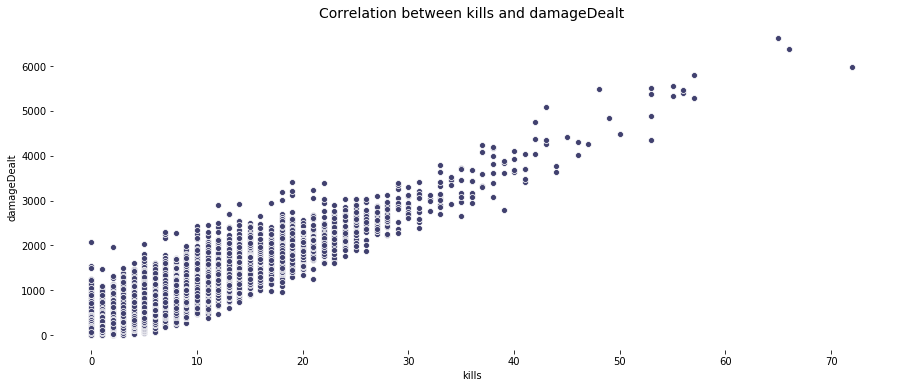

In [22]:
f,ax = plt.subplots(figsize=(15,6))
a5=sns.scatterplot(x=data['kills'],y=data['damageDealt']
                ,color='#41416f')
a5.set_title('Correlation between kills and damageDealt',fontsize=14);
sns.despine(bottom=True, left=True)

In [23]:
kills_0, kills_m = data[data['kills']==0], data[data['kills']>=1]

In [24]:
data.groupby('kills_grouped')['damageDealt'].mean().sort_values(ascending=False).reset_index()

,kills_grouped,damageDealt
0,+50 kills,5535.769
1,20-50 kills,2568.529
2,10-20 kills,1199.095
3,6-9 kills,711.481
4,4-5 kills,463.882
5,1-3 kills,193.808
6,0 kills,40.678


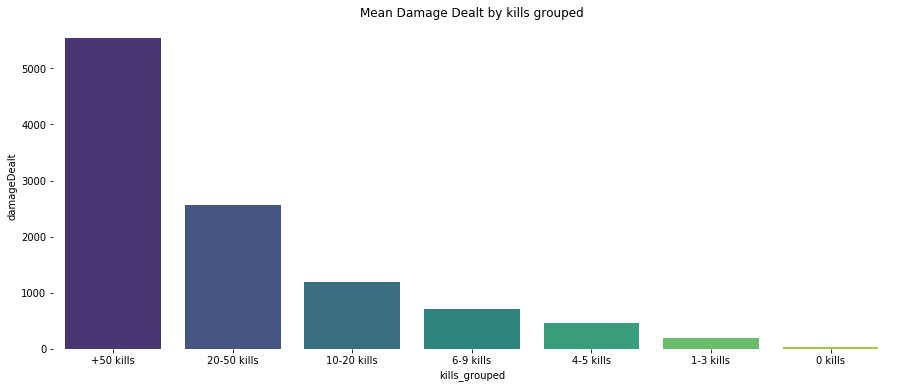

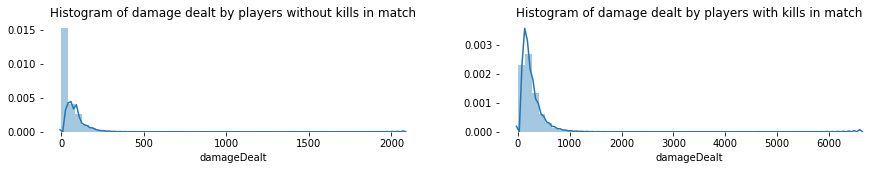

In [25]:
f,ax = plt.subplots(figsize=(15,6))
b1 = sns.barplot(x='kills_grouped',y='damageDealt',
                 data=data.groupby('kills_grouped')['damageDealt'].mean().sort_values(ascending=False).reset_index(),palette='viridis')
sns.despine(bottom=True, left=True)
f,ax = plt.subplots(1,2,figsize=(15,2))
b2 = sns.distplot(kills_0['damageDealt'],bins=50,ax=ax[0])
b2.set_title('Histogram of damage dealt by players without kills in match');
b3 = sns.distplot(kills_m['damageDealt'],bins=50,ax=ax[1]);
b3.set_title('Histogram of damage dealt by players with kills in match');
b1.set_title('Mean Damage Dealt by kills grouped');
sns.despine(bottom=True, left=True)

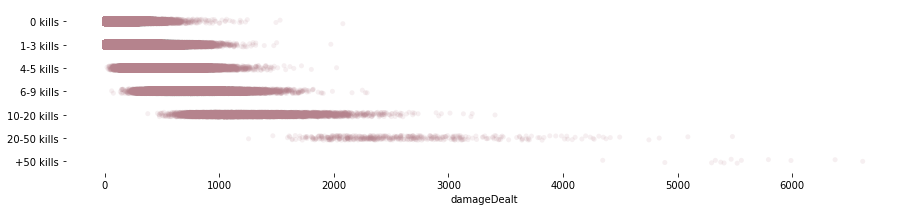

In [26]:
plt.figure(figsize=(15,3))
st3 = sns.stripplot(y='kills_grouped',x='damageDealt',data = data,
                   jitter=True, 
                   marker='o', 
                   alpha=0.12,
                   color='#B5838D')
st3.set_ylabel('');
sns.despine(left=True,bottom=True)

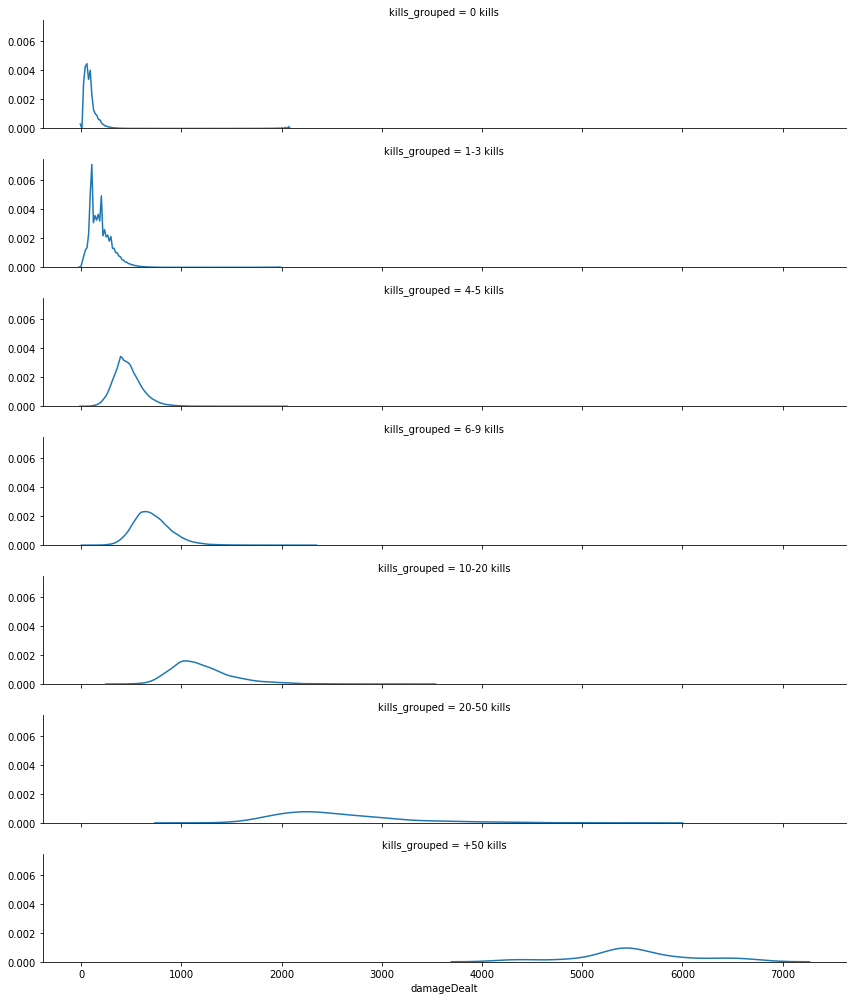

In [27]:
g = sns.FacetGrid(data, row="kills_grouped",
                  height=2, aspect=6)
g.map(sns.kdeplot, "damageDealt");

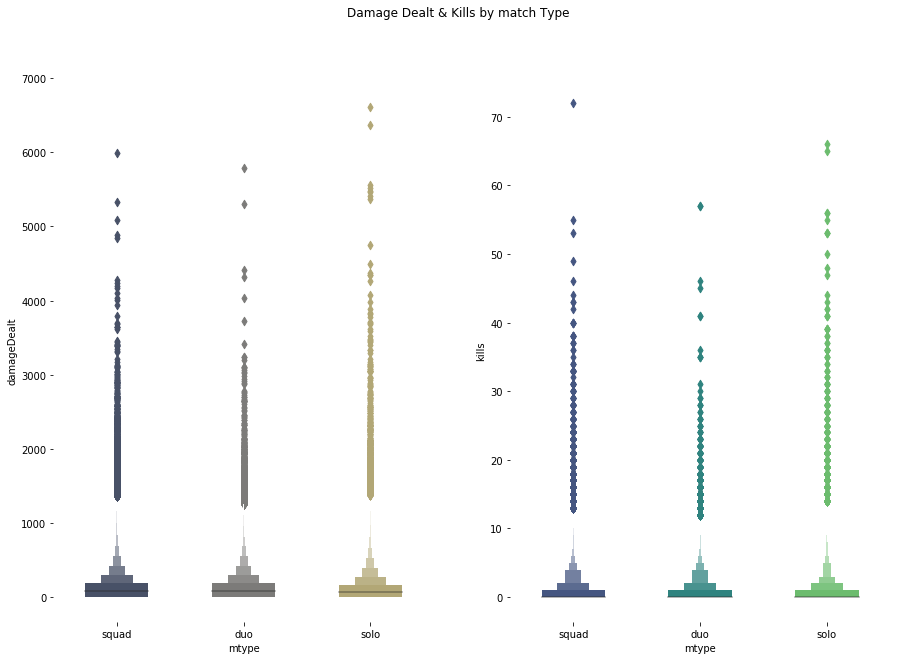

In [28]:
f,ax = plt.subplots(1,2,figsize=(15,10))
sns.boxenplot(x='mtype',y='damageDealt',data=data,ax=ax[0],palette='cividis',width=0.5)
sns.boxenplot(x='mtype',y='kills',data=data,ax=ax[1],palette='viridis',width=0.5)
plt.suptitle('Damage Dealt & Kills by match Type');
sns.despine(bottom=True, left=True)

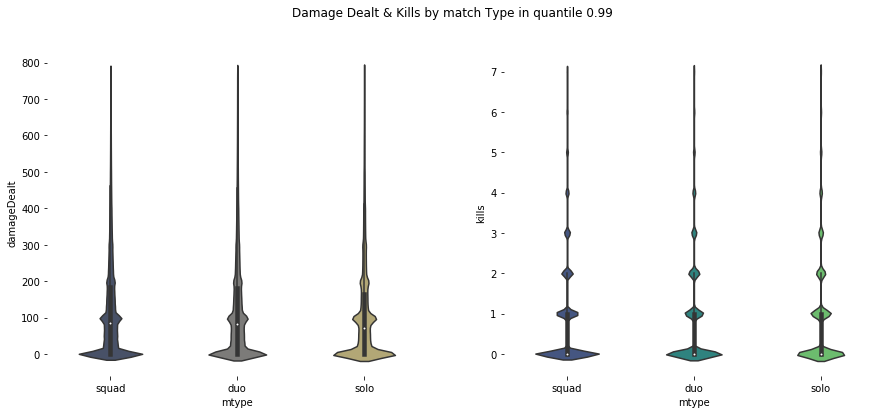

In [29]:
f,ax = plt.subplots(1,2,figsize=(15,6))
sns.violinplot(x='mtype',y='damageDealt',data=data[data['damageDealt']<=data['damageDealt'].quantile(0.99)],ax=ax[0],palette='cividis',width=0.5)
sns.violinplot(x='mtype',y='kills',data=data[data['kills']<=data['kills'].quantile(0.99)],ax=ax[1],palette='viridis',width=0.5)
plt.suptitle('Damage Dealt & Kills by match Type in quantile 0.99');
sns.despine(bottom=True, left=True)

In [30]:
data.groupby('mtype')['damageDealt'].agg(['mean','sum']).reset_index()

,mtype,mean,sum
0,duo,131.392,172907482.996
1,solo,119.165,85884040.457
2,squad,133.803,322503144.399


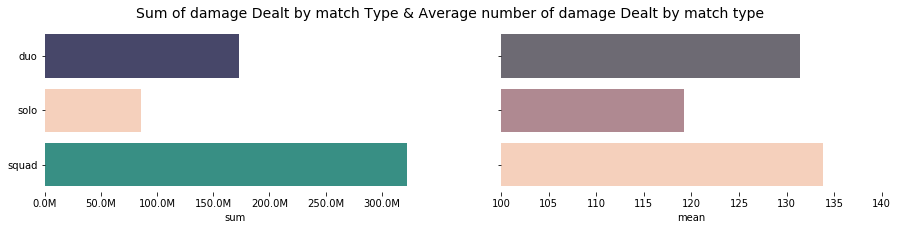

In [31]:
f,ax = plt.subplots(1,2,figsize=(15,3),sharey=True)
b0 =  sns.barplot(y='mtype',x='mean',data=data.groupby('mtype')['damageDealt'].agg(['mean','sum']).reset_index(),palette=['#6D6875','#B5838D','#FFCDB2'],ax=ax[1])
b0.set_xlim(100,140)
sns.despine(bottom=True, left=True)
b01 =  sns.barplot(y='mtype',x='sum',data=data.groupby('mtype')['damageDealt'].agg(['mean','sum']).reset_index(),palette=['#41416f','#FFCDB2','#2A9D8F'],ax=ax[0])
b01.set_ylabel('');
b0.set_ylabel('');
plt.suptitle('Sum of damage Dealt by match Type & Average number of damage Dealt by match type',fontsize=14);
b01.xaxis.set_major_formatter(formatter)

In [32]:
data.sample()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,kills_grouped,mtype
66455,5eccd1d5c962b8,97ed095bdbde21,8cfed7f4dd2b26,0,0,195.200,1,0,0,33,...,0,0.000,3,1,342.400,2,1557,0.107,1-3 kills,squad


In [33]:
data[['kills','headshotKills']].sample(5)

,kills,headshotKills
2751342,3,0
4080005,2,0
4263060,3,2
2467617,0,0
707467,0,0


In [34]:
data['hs_kill'] = (data['headshotKills']/data['kills']).fillna(0)

In [35]:
print(f"Players made {data['kills'].sum()} kills, where HeadShots kills were {data['headshotKills'].sum()}.", f"\nSo we can say that {round(data['headshotKills'].sum()/data['kills'].sum()*100,2)} % were HS\'s")

Players made 4112480 kills, where HeadShots kills were 1008659. 
So we can say that 24.53 % were HS's


In [36]:
data.groupby('kills_grouped')['headshotKills'].agg(['sum','mean']).reset_index().T

,0,1,2,3,4,5,6
kills_grouped,+50 kills,0 kills,1-3 kills,10-20 kills,20-50 kills,4-5 kills,6-9 kills
sum,278,0,610518,43236,3491,206020,145116
mean,21.385,0.000,0.374,3.466,7.758,1.078,1.809


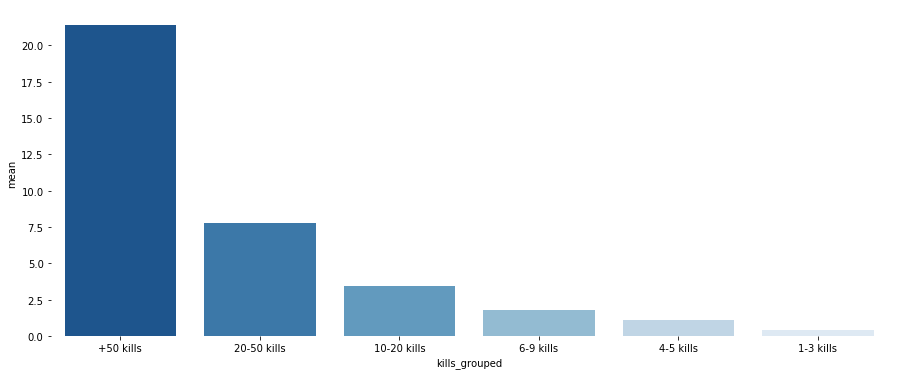

In [37]:
f,ax = plt.subplots(figsize=(15,6))
d1 = sns.barplot(x='kills_grouped',
                 y='mean',
                 data=data[data['kills']>0].groupby('kills_grouped')['headshotKills'].agg(['sum','mean']).reset_index().sort_values(by='mean',ascending=False),palette='Blues_r')
sns.despine(bottom=True, left=True)


In [38]:
data[data['kills']>0]['headshotKills'].describe()

count   1917244.000
mean          0.526
std           0.827
min           0.000
25%           0.000
50%           0.000
75%           1.000
max          64.000
Name: headshotKills, dtype: float64

In [39]:
df0 = data[data['kills']>0].groupby('kills')['headshotKills','kills'].sum().rename(columns={'kills':'Kills'}).reset_index()
df0['hs_ratio'] = df0['headshotKills']/df0['Kills']
df0.head()

,kills,headshotKills,Kills,hs_ratio
0,1,218525,928079,0.235
1,2,223450,944932,0.236
2,3,168543,697323,0.242
3,4,122458,498172,0.246
4,5,83562,332885,0.251


In [40]:
df0_tidy = df0.drop('hs_ratio',axis=1).melt(id_vars='kills')

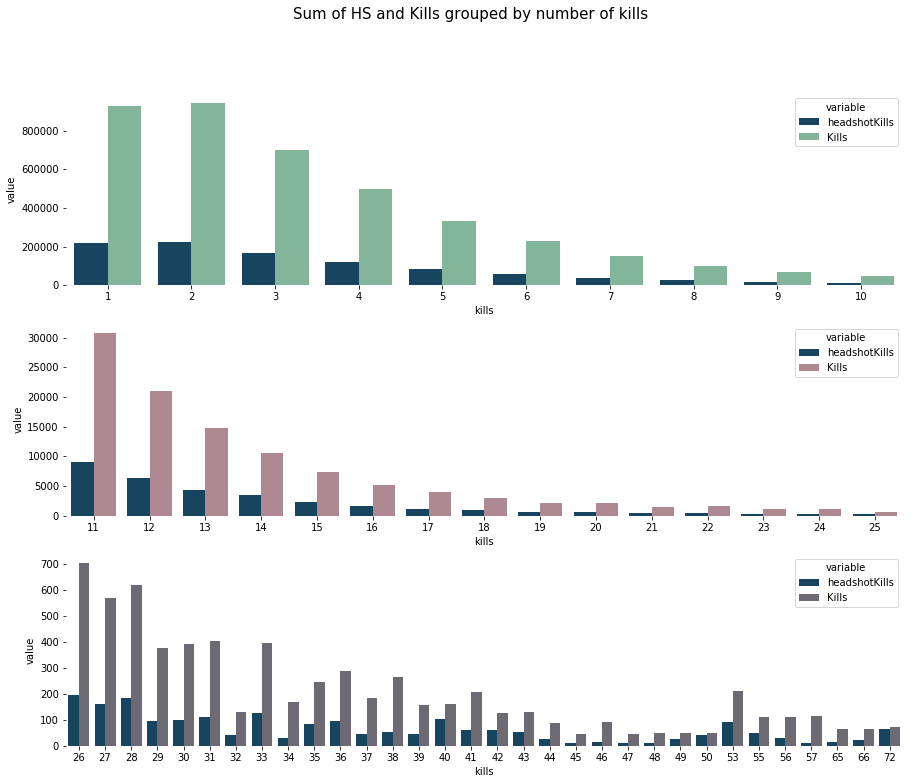

In [41]:
f,ax = plt.subplots(3,1,figsize=(15,12))

plt.suptitle('Sum of HS and Kills grouped by number of kills',fontsize=15);
e = sns.barplot(y='value',x='kills',hue='variable',data=df0_tidy[df0_tidy['kills']<=10],palette=['#0B486B','#79BD9A','#B5838D'],
               ax=ax[0])
e2 = sns.barplot(y='value',x='kills',hue='variable',data=df0_tidy[(df0_tidy['kills']>10)&(df0_tidy['kills']<=25)],palette=['#0B486B','#B5838D'],
               ax=ax[1])

e3 = sns.barplot(y='value',x='kills',hue='variable',data=df0_tidy[df0_tidy['kills']>25],palette=['#0B486B','#6D6875'],
               ax=ax[2])
#df0

sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)


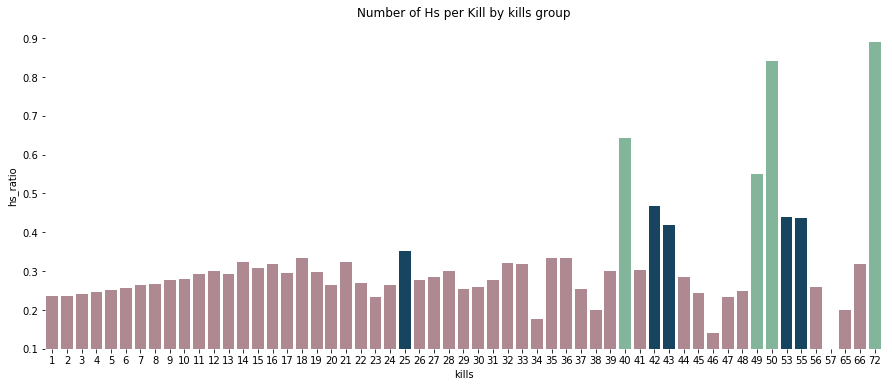

In [42]:
colls = []
for i in df0['hs_ratio']:
    if i >= 0.5:
        colls.append('#79BD9A')
    elif i >= 0.35:
        colls.append('#0B486B')
    else:
        colls.append('#B5838D')

f,ax = plt.subplots(figsize=(15,6))
e4 = sns.barplot(x='kills',
                 y='hs_ratio',
                 data=df0,palette=colls)
e4.set_ylim(0.1,0.94);
sns.despine(left=True, bottom=True)
e4.set_title('Number of Hs per Kill by kills group');

In [43]:
data.groupby('mtype')['headshotKills'].agg(['sum','mean']).reset_index()

,mtype,sum,mean
0,duo,293706,0.223
1,solo,179660,0.249
2,squad,535293,0.222


In [44]:
df1 = data[data['kills']>0].groupby('mtype')['headshotKills','kills'].sum().rename(columns={'kills':'Kills'}).reset_index()
df1['hs_ratio'] = df0['headshotKills']/df0['Kills']
df1.head()

,mtype,headshotKills,Kills,hs_ratio
0,duo,293706,1219251,0.235
1,solo,179660,675206,0.236
2,squad,535293,2218023,0.242


In [45]:
df1_tidy = df1.drop('hs_ratio',axis=1).melt(id_vars='mtype')

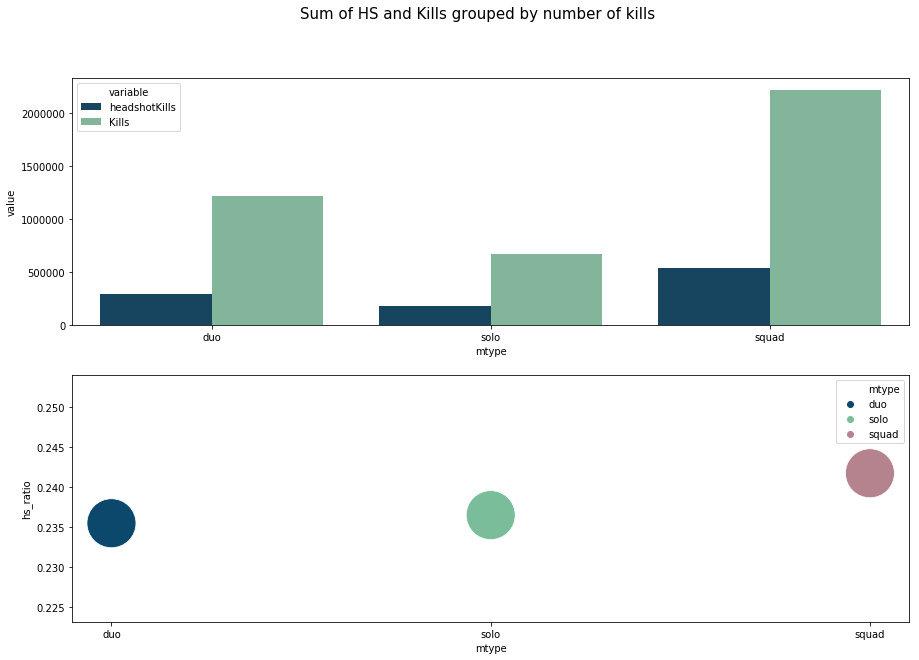

In [46]:
f,ax = plt.subplots(2,1,figsize=(15,10))
plt.suptitle('Sum of HS and Kills grouped by number of kills',fontsize=15);
f = sns.barplot(y='value',x='mtype',hue='variable',data=df1_tidy,palette=['#0B486B','#79BD9A','#B5838D'],
               ax=ax[0])
f0 = sns.scatterplot(y='hs_ratio',x='mtype',data=df1,ax=ax[1],s=2400,hue='mtype',palette=['#0B486B','#79BD9A','#B5838D'])

In [47]:
# players in group
player_groups = data.groupby(['matchId','groupId','mtype'])['Id'].count().to_frame('players_count').reset_index()
player_groups.loc[player_groups['players_count']>9,'players_count'] = '10+'
player_groups['players_count'] = player_groups['players_count'].astype(str)
player_groups['players_count'].value_counts() 

1      792277
2      654211
3      247137
4      217540
5       53426
6       25875
7       14788
8        8422
10+      8237
9        4832
Name: players_count, dtype: int64

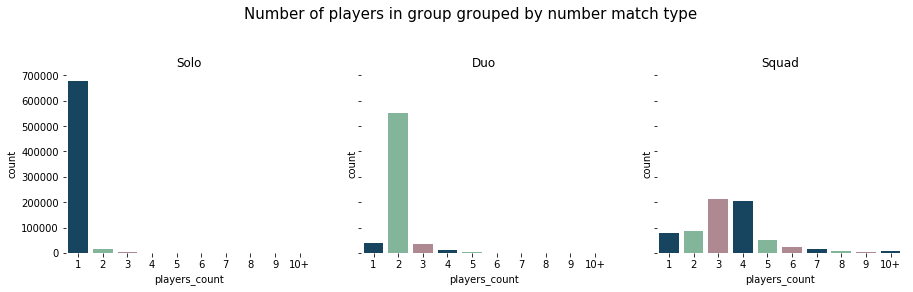

In [48]:
f,ax = plt.subplots(1,3,figsize=(15,4),sharey=True)
f.subplots_adjust(top=0.75)
plt.suptitle('Number of players in group grouped by number match type',fontsize=15);
co1 = sns.countplot(x='players_count',
              data=player_groups[player_groups['mtype']=='solo'],
              order=['1','2','3','4','5','6','7','8','9','10+'],palette=['#0B486B','#79BD9A','#B5838D'],ax=ax[0] )
co1.set_title('Solo');
co2 = sns.countplot(x='players_count',
              data=player_groups[player_groups['mtype']=='duo'],
              order=['1','2','3','4','5','6','7','8','9','10+'],palette=['#0B486B','#79BD9A','#B5838D'],ax=ax[1] )
co2.set_title('Duo');
co3 = sns.countplot(x='players_count',
              data=player_groups[player_groups['mtype']=='squad'],
              order=['1','2','3','4','5','6','7','8','9','10+'],palette=['#0B486B','#79BD9A','#B5838D'],ax=ax[2] )
co3.set_title('Squad');
sns.despine(left=True, bottom=True)


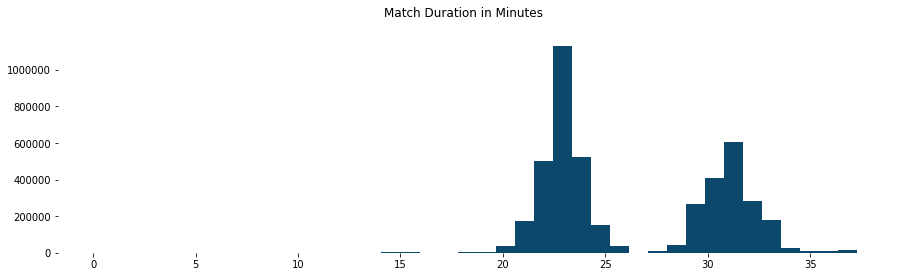

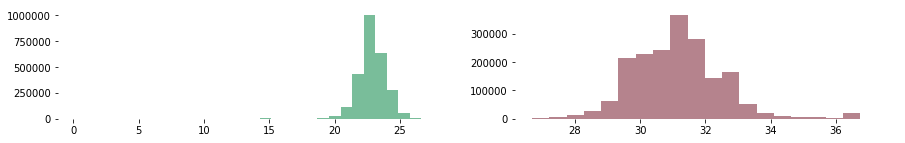

In [74]:
data['matchDuration_minutes'] = data['matchDuration']/60
f,ax = plt.subplots(figsize=(15,4))
h1=data['matchDuration_minutes'].hist(bins=40,color='#0B486B')
h1.grid(False)
plt.suptitle('Match Duration in Minutes',fontsize=12);
sns.despine(left=True, bottom=True)
d1,d2  = data[data['matchDuration']<1600], data[data['matchDuration']>=1600]
f,ax = plt.subplots(1,2,figsize=(15,2))
h2 = d1['matchDuration_minutes'].hist(bins=30,ax=ax[0],color='#79BD9A')
h3 = d2['matchDuration_minutes'].hist(bins=20,ax=ax[1],color='#B5838D')

sns.despine(left=True, bottom=True)
h2.grid(False)
h3.grid(False)

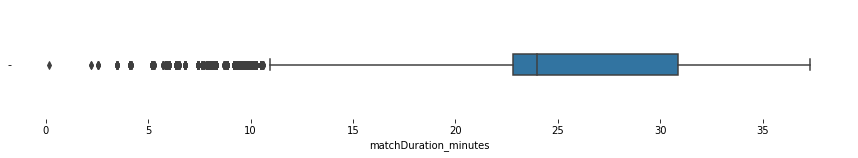

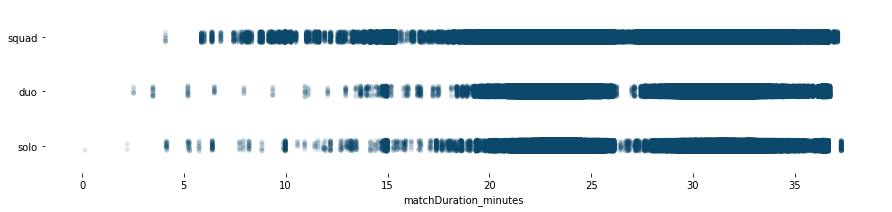

In [82]:
f,ax = plt.subplots(figsize=(15,2))
sns.boxplot(data['matchDuration_minutes'],width=0.2)
sns.despine(left=True, bottom=True)
plt.figure(figsize=(15,3))
st4 = sns.stripplot(y='mtype',x='matchDuration_minutes',data = data,
                   jitter=True, 
                   marker='o', 
                   alpha=0.12,
                   color='#0B486B')
st4.set_ylabel('');
sns.despine(left=True,bottom=True)

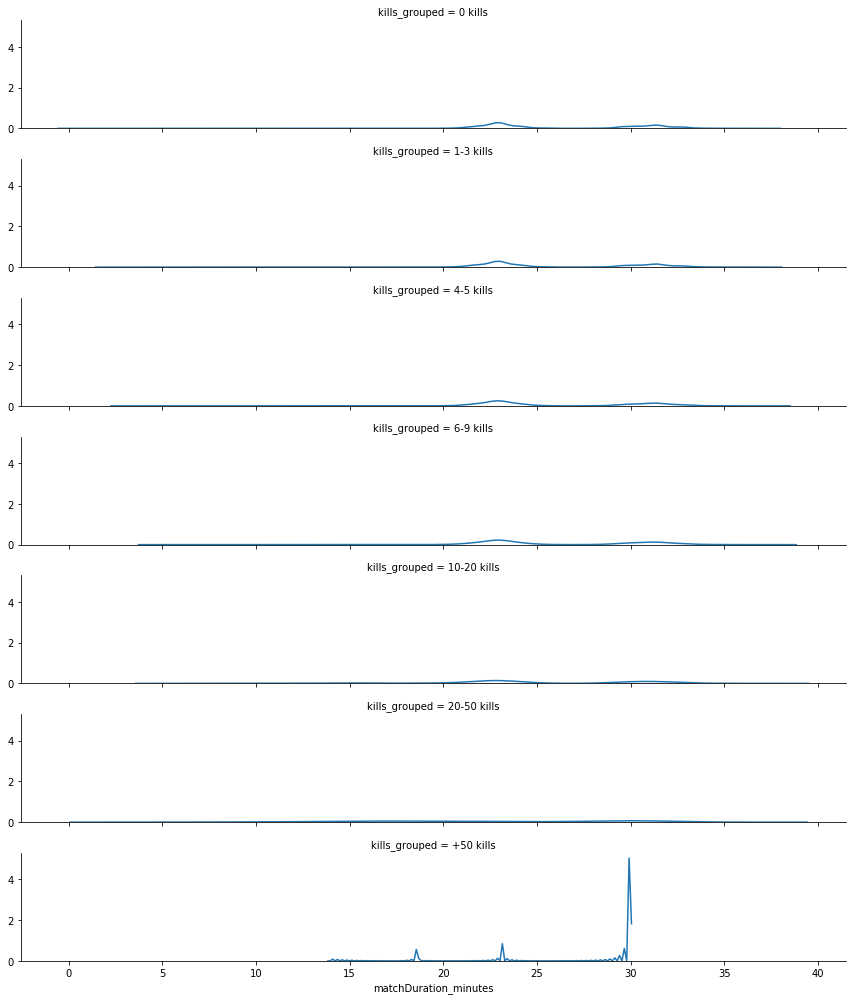

In [109]:
g = sns.FacetGrid(data, row="kills_grouped",
                  height=2, aspect=6)
g.map(sns.kdeplot, "matchDuration_minutes");

In [89]:
data['matchDuration_minutes'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
matchDuration_minutes,4446966.000,26.325,4.312,0.150,22.783,23.967,30.850,37.283


In [84]:
data.groupby('mtype')['matchDuration_minutes'].agg(['mean','std']).T

mtype,duo,solo,squad
mean,26.589,26.677,26.076
std,4.259,4.284,4.334


In [95]:
data.groupby('kills_grouped')['matchDuration_minutes'].agg(['mean','std']).T

kills_grouped,+50 kills,0 kills,1-3 kills,10-20 kills,20-50 kills,4-5 kills,6-9 kills
mean,27.332,26.428,26.212,24.729,22.344,26.183,25.987
std,5.353,4.298,4.283,5.814,6.750,4.391,4.707


In [108]:
data.corr()['winPlacePerc'].to_frame().T

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,hs_kill,matchDuration_minutes
winPlacePerc,0.299,0.634,0.441,0.280,0.278,0.428,-0.719,0.013,0.420,0.378,...,0.035,0.150,0.016,0.073,0.811,0.584,0.007,1.000,0.181,-0.005


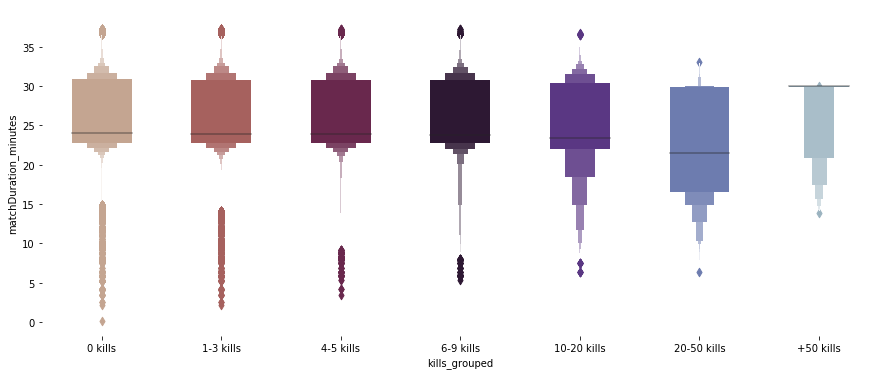

In [97]:
f,ax = plt.subplots(figsize=(15,6))
sns.boxenplot(y = data['matchDuration_minutes'],x='kills_grouped',width=0.5,data=data,palette='twilight_r')
sns.despine(left=True, bottom=True)

* Mean match duration is 26 minutes.
* Mean match duration by matchType is very simillar in range (26-27 minutes)
* 75% of matches were shorter then 31 minutes.
* If we check match duration by number of kills we can say that longer match is not equal more kills

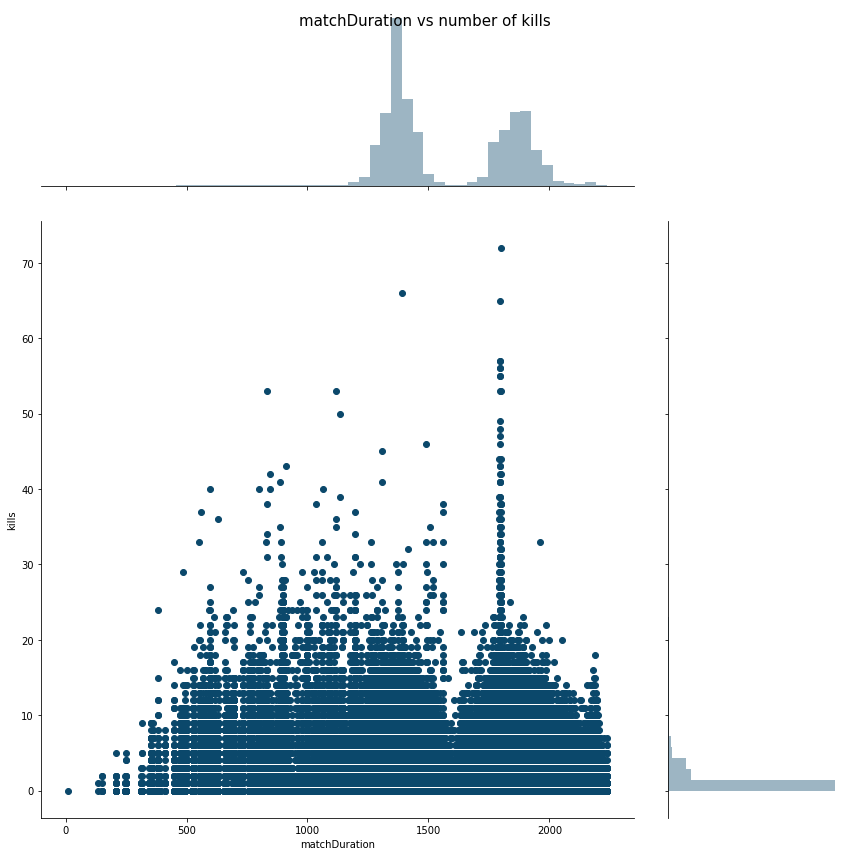

In [102]:
g = sns.jointplot(x="matchDuration", y="kills", data=data, height=12, ratio=3,color="#0B486B")
g.fig.suptitle('matchDuration vs number of kills',fontsize=15);

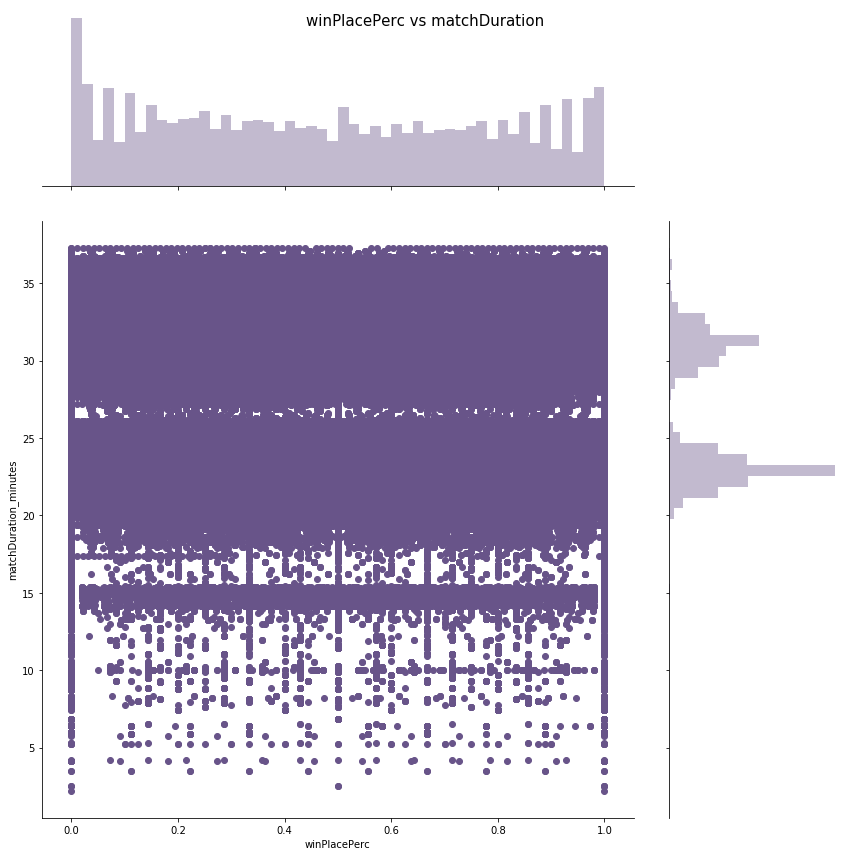

In [104]:
g = sns.jointplot(x="winPlacePerc", y="matchDuration_minutes", data=data, height=12, ratio=3,color="#685489")
g.fig.suptitle('winPlacePerc vs matchDuration',fontsize=15);